In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns

### Fixed single Boston experiment for all dataset as points

In [7]:
# pfailure for the first layer
p = 1e-2

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_23 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 51        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 475us/step - loss: 35673.9922 - acc: 0.0000e+00 - mean_squared_error: 35673.9922 - mean_absolute_error: 179.5466 - val_loss: 24918.4902 - val_acc: 0.0000e+00 - val_mean_squared_error: 24918.4902 - val_mean_absolute_error: 145.4957
Epoch 2/50
404/404 [==============================] - 0s 7us/step - lo

Epoch 28/50
404/404 [==============================] - 0s 5us/step - loss: 188.6741 - acc: 0.0000e+00 - mean_squared_error: 188.6741 - mean_absolute_error: 11.1788 - val_loss: 183.3668 - val_acc: 0.0196 - val_mean_squared_error: 183.3668 - val_mean_absolute_error: 11.0427
Epoch 29/50
404/404 [==============================] - 0s 5us/step - loss: 181.1726 - acc: 0.0000e+00 - mean_squared_error: 181.1726 - mean_absolute_error: 10.9089 - val_loss: 176.1357 - val_acc: 0.0196 - val_mean_squared_error: 176.1357 - val_mean_absolute_error: 10.7997
Epoch 30/50
404/404 [==============================] - 0s 5us/step - loss: 174.6435 - acc: 0.0050 - mean_squared_error: 174.6435 - mean_absolute_error: 10.6595 - val_loss: 169.8643 - val_acc: 0.0294 - val_mean_squared_error: 169.8643 - val_mean_absolute_error: 10.5813
Epoch 31/50
404/404 [==============================] - 0s 5us/step - loss: 168.9328 - acc: 0.0050 - mean_squared_error: 168.9328 - mean_absolute_error: 10.4330 - val_loss: 164.3186 - va

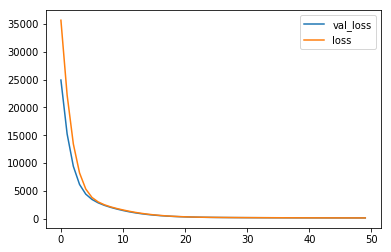

Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                700       
_________________________________________________________________
lambda_3 (Lambda)            (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)            

In [18]:
# run with random weights and multiple inputs
exp = BostonHousingExperiment(N = [50, 50], p_inference = [0, p, 0, 0], activation = 'relu', epochs = 50, do_print = True)

In [26]:
# obtaining data points
data = exp.get_inputs('all')

# obtaining errors and bounds for data points
rmean, rstd = exp.run(data, repetitions = 10000)

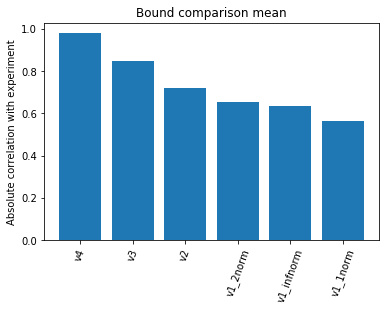

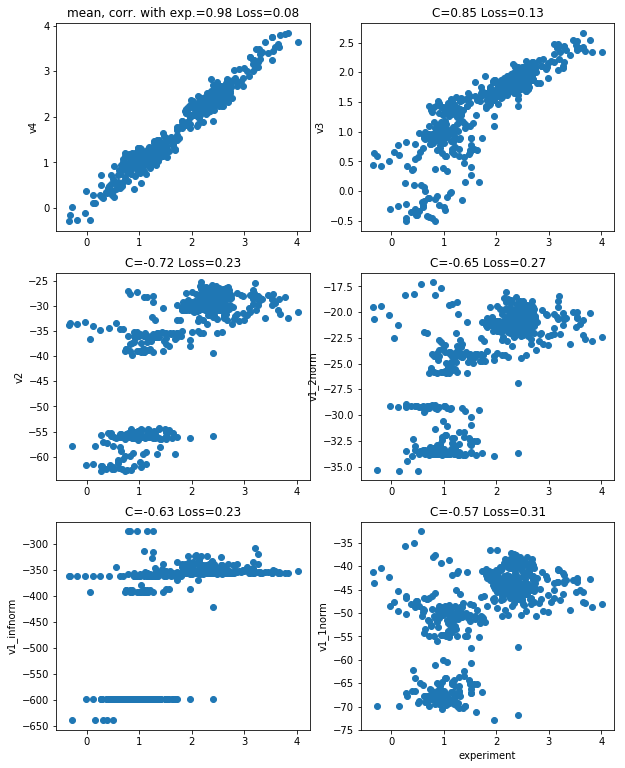

,bound,corr,rank_loss
0,v4,0.979658,0.079427
1,v3,0.850065,0.131734
2,v2,-0.720762,0.229742
3,v1_2norm,-0.652901,0.273643
4,v1_infnorm,-0.633611,0.227590
5,v1_1norm,-0.565012,0.306555


In [27]:
# showing results for mean
exp.process_scalar_output(rmean, 'mean')

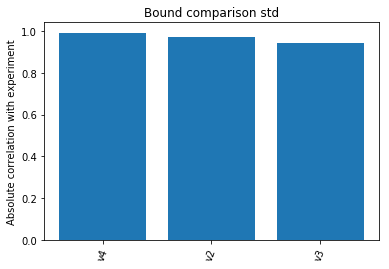

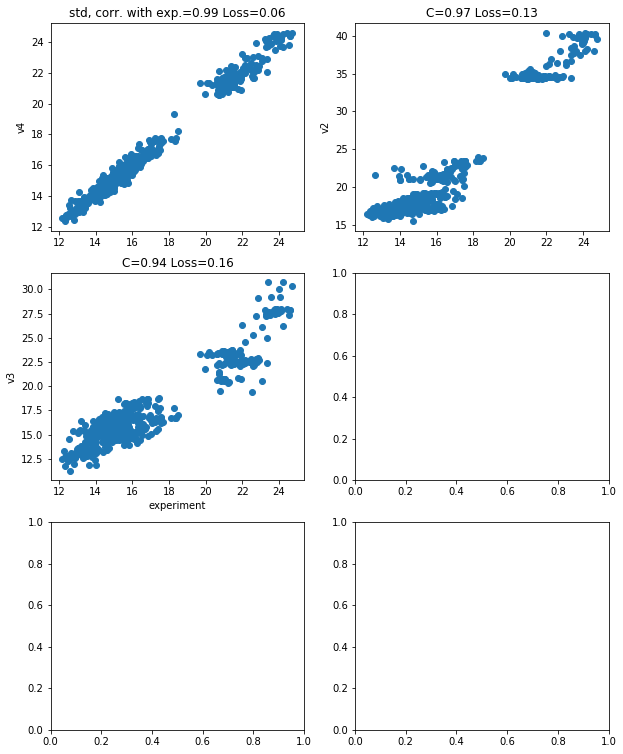

,bound,corr,rank_loss
0,v4,0.992838,0.057888
1,v2,0.970739,0.128157
2,v3,0.943482,0.158612


In [28]:
# showing results for std
exp.process_scalar_output(rstd, 'std')

### Fixing the data point and comparing different networks on it

In [22]:
# pfailure for the first layer
p = 1e-2

# obtaining some experiment
exp = BostonHousingExperiment(N = [50, 50], epochs = 0, p_inference = [0, p, 0, 0], activation = 'relu', do_print = True)

# input to test
data = exp.get_inputs(1)

10.300038226714639 [ 8.54042514e-01  7.36435319e-01  2.91470196e-01  1.90918238e+00
 -8.80725777e-01 -2.25166793e+00  3.76757966e-01  5.99580955e-01
  3.81969408e-04  1.84334856e+00]
9.78425852237025 [-1.25079135 -0.45108616  1.59612429  1.61258138  0.51452514  0.53624509
  1.30461935 -1.78631417 -0.45401377 -0.4719577 ]
1.657671558548085 [ 0.62543212 -1.81297413  0.4626155  -0.72356596 -0.27155295  0.44814957
  0.21042302  1.24791142  0.2260959   1.85182558]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 50)                700       
_________________________________________________________________
dense_77 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 51        
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
______

In [29]:
# array with networks
results_mean = []
results_std = []

# looking at 50 random networks
for i in tqdm(range(20)):
    # for some reason np.random.randn inside BostonHousingExperiment always uses the same seed...
    seed = int(np.random.rand() * 10000)
    
    # run with random weights and single input
    exp = BostonHousingExperiment(N = [50, 50], epochs = 20, p_inference = [0, p, 0, 0], activation = 'relu', seed = seed)

    # obtaining data
    rmean, rstd = exp.run(data, repetitions = 10000)
    
    # adding to results
    results_mean += [rmean]
    results_std += [rstd]
    
    # removing the model
    K.clear_session()

100%|██████████| 20/20 [00:19<00:00,  1.00it/s]


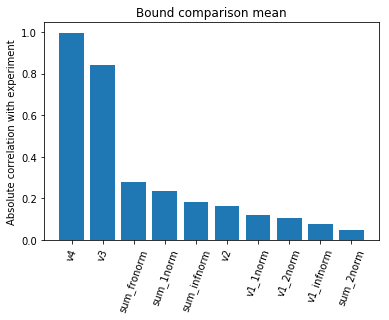

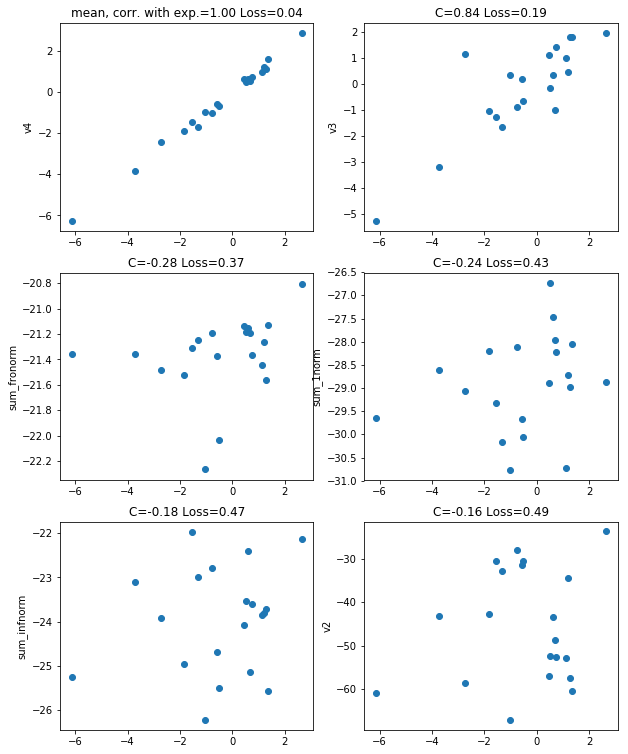

,bound,corr,rank_loss
0,v4,0.996559,0.042105
1,v3,0.839476,0.194737
2,sum_fronorm,-0.279518,0.368421
3,sum_1norm,-0.235875,0.426316
4,sum_infnorm,-0.184355,0.468421
5,v2,-0.162523,0.494737
6,v1_1norm,0.119695,0.484211
7,v1_2norm,-0.104447,0.484211
8,v1_infnorm,-0.078171,0.468421
9,sum_2norm,-0.049540,0.468421


In [30]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_mean), 'mean')

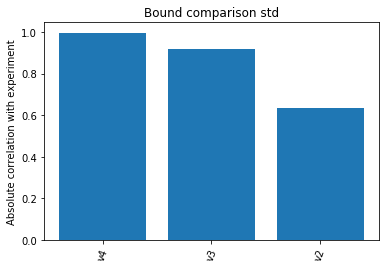

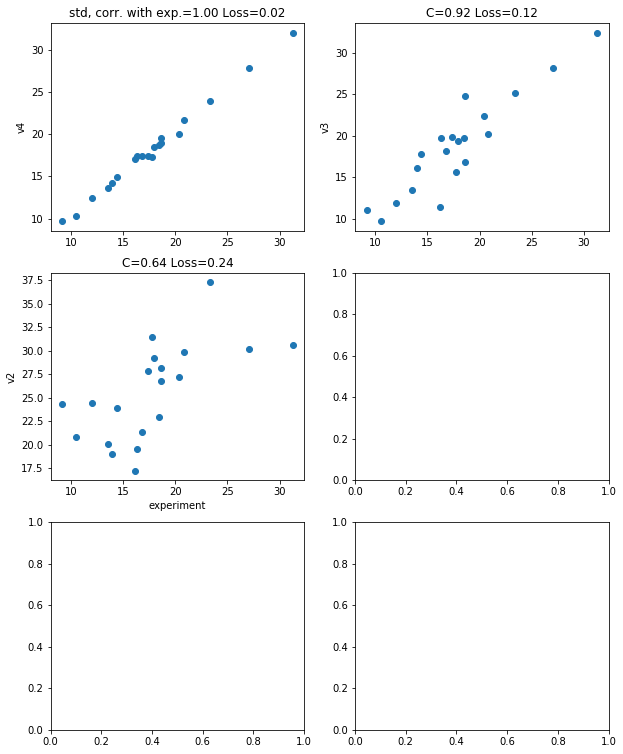

,bound,corr,rank_loss
0,v4,0.997132,0.021053
1,v3,0.920465,0.121053
2,v2,0.636943,0.236842


In [31]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_std), 'std')